#fuyu-8b

https://huggingface.co/adept/fuyu-8b

https://huggingface.co/ybelkada/fuyu-8b-sharded

In [1]:
!pip install git+https://github.com/huggingface/transformers.git@main accelerate

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-uponw4d9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-uponw4d9
  Resolved https://github.com/huggingface/transformers.git to commit 224794b0116d286cff3e82a4eeb014252796c00f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Original model

In [2]:
from transformers import FuyuForCausalLM, AutoTokenizer, FuyuProcessor, FuyuImageProcessor
from PIL import Image

In [3]:
# load model, tokenizer, and processor
pretrained_path = "adept/fuyu-8b"
tokenizer = AutoTokenizer.from_pretrained(pretrained_path)

image_processor = FuyuImageProcessor()
processor = FuyuProcessor(image_processor=image_processor, tokenizer=tokenizer)

model = FuyuForCausalLM.from_pretrained(pretrained_path, device_map="cuda:0")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

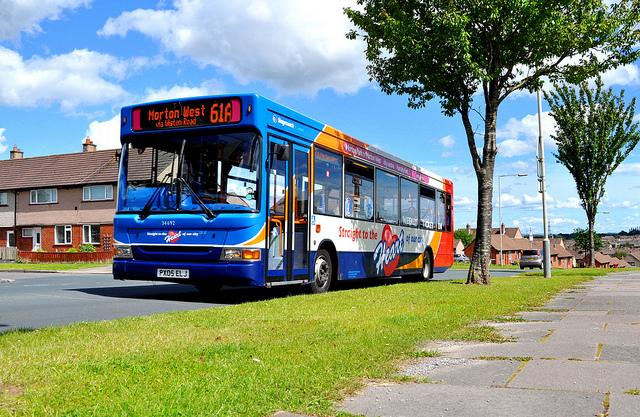

In [14]:
text_prompt = "What color is the bus?\n"
image_path = "https://huggingface.co/adept/fuyu-8b/resolve/main/bus.png"

import requests
image_pil = Image.open(requests.get(image_path, stream=True).raw).convert('RGB')
image_pil

In [15]:
model_inputs = processor(text=text_prompt, images=[image_pil], device="cuda:0")
for k, v in model_inputs.items():
    model_inputs[k] = v.to("cuda:0")

generation_output = model.generate(**model_inputs, max_new_tokens=6)
generation_text = processor.batch_decode(generation_output[:, -6:], skip_special_tokens=True)
generation_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['The bus is blue.\n']

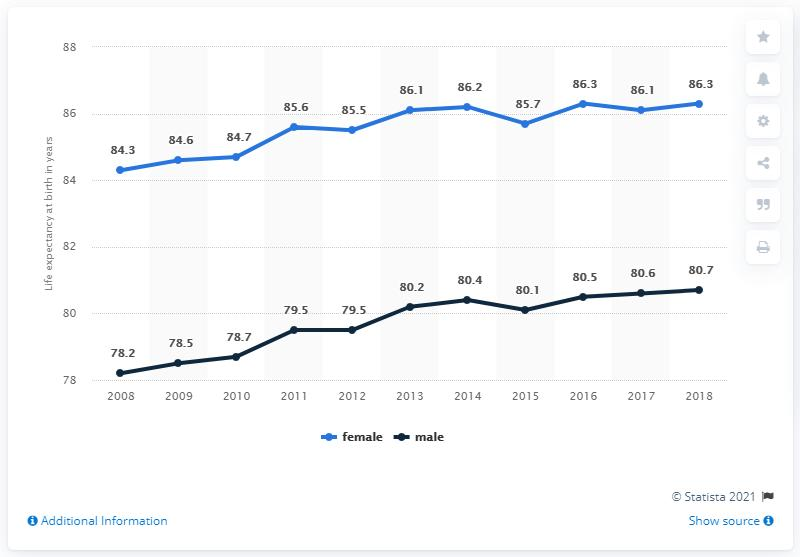

In [16]:
text_prompt = "What is the highest life expectancy at birth of male?\n"

image_path = "https://huggingface.co/adept/fuyu-8b/resolve/main/chart.png"
image_pil = Image.open(requests.get(image_path, stream=True).raw).convert('RGB')
image_pil

In [17]:
model_inputs = processor(text=text_prompt, images=[image_pil], device="cuda:0")
for k, v in model_inputs.items():
    model_inputs[k] = v.to("cuda:0")

generation_output = model.generate(**model_inputs, max_new_tokens=16)
generation_text = processor.batch_decode(generation_output[:, -16:], skip_special_tokens=True)
generation_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['The life expectancy at birth of males in 2018 is 80.7.\n']

# sharded model

In [2]:
!pip install -q -U bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 19.5 MB/s eta 0:00:00


In [3]:
import torch
from transformers import AutoProcessor, FuyuForCausalLM

model_id = "ybelkada/fuyu-8b-sharded"

processor = AutoProcessor.from_pretrained(model_id)

model = FuyuForCausalLM.from_pretrained(model_id, load_in_4bit=True, device_map="auto")


Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

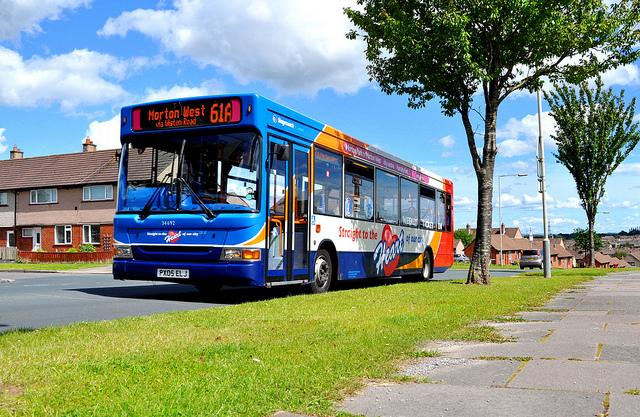

In [5]:
text_prompt = "What color is the bus?\n"
image_path = "https://huggingface.co/adept/fuyu-8b/resolve/main/bus.png"

import requests
from PIL import Image
image_pil = Image.open(requests.get(image_path, stream=True).raw).convert('RGB')
image_pil

In [6]:
model_inputs = processor(text=text_prompt, images=[image_pil], device="cuda:0")
for k, v in model_inputs.items():
    model_inputs[k] = v.to("cuda:0")

generation_output = model.generate(**model_inputs, max_new_tokens=6)
generation_text = processor.batch_decode(generation_output[:, -6:], skip_special_tokens=True)
generation_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:224: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


['The bus is blue.\n']

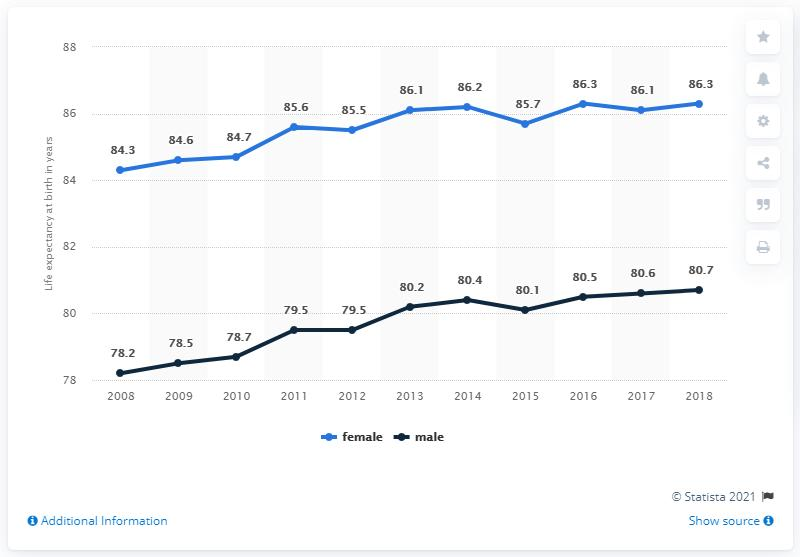

In [8]:
text_prompt = "What is the highest life expectancy at birth of male?\n"

image_path = "https://huggingface.co/adept/fuyu-8b/resolve/main/chart.png"
image_pil = Image.open(requests.get(image_path, stream=True).raw).convert('RGB')
image_pil

In [9]:
model_inputs = processor(text=text_prompt, images=[image_pil], device="cuda:0")
for k, v in model_inputs.items():
    model_inputs[k] = v.to("cuda:0")

generation_output = model.generate(**model_inputs, max_new_tokens=16)
generation_text = processor.batch_decode(generation_output[:, -16:], skip_special_tokens=True)
generation_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['The life expectancy at birth of males in the graph is 80.7 years.\n']